In [1]:
import pandas as pd
from utils.basket_analysis_utils import encode_units, remove_duplicate, save_frequency_to_csv, zhang
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load file into a dataframe
df = pd.read_excel("data/Data test.xlsx")

In [3]:
# Study of the dataframe  

In [4]:
df

,id_customer,id_order,product_id,product_quantity
0,1.0,186465.0,1506,1
1,NaN,NaN,6105,1
2,NaN,NaN,7712,1
3,NaN,NaN,7748,1
4,NaN,196500.0,2666,1
...,...,...,...,...
243207,NaN,NaN,3023,1
243208,NaN,NaN,3382,1
243209,NaN,NaN,4036,1
243210,89851.0,199938.0,2181,1


In [5]:
df = df.fillna(method='ffill')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243212 entries, 0 to 243211
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_customer       243212 non-null  float64
 1   id_order          243212 non-null  float64
 2   product_id        243212 non-null  int64  
 3   product_quantity  243212 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 7.4 MB


In [7]:
df = df.astype({'id_customer': 'int32','id_order': 'int32', 'product_id' : 'int32', 'product_quantity' : 'int32'})
df.dtypes

id_customer         int32
id_order            int32
product_id          int32
product_quantity    int32
dtype: object

In [8]:
# Delete identical orders made by the same customer
df = remove_duplicate(df)

In [9]:
print("nbr customer : ", len(df.id_customer.unique()))
print("nbr order : ", len(df.id_order.unique()))
print("nbr product : ", len(df.product_id.unique()))

nbr customer :  13933
nbr order :  19248
nbr product :  3675


<AxesSubplot:xlabel='Product ID', ylabel='Number'>

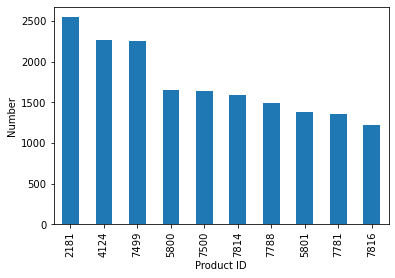

In [10]:
products_top = df.product_id.value_counts().nlargest(10)
products_top.plot(kind="bar", xlabel="Product ID", ylabel="Number")

> Products with more than 10% occurrence :
- 2181 : 13.24%
- 4124 : 11.81%
- 7499 : 11.72%

In [11]:
# Convert dataframe in one-hot encoded format

In [12]:
basket = (df.groupby(['id_order','product_id'])['product_quantity'].sum()
          .unstack('product_id',fill_value=0))
basket_sets = basket.applymap(encode_units)
basket_sets

product_id,1502,1504,1506,1507,1508,1509,1512,1514,1515,1517,...,8956,8957,8958,8959,8983,8986,9013,9029,9031,9040
id_order,,,,,,,,,,,,,,,,,,,,,
180508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Get the most frequent items with the apriori algorithm

In [14]:
frequent_itemsets = apriori(basket_sets, min_support=0.008, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.015794,(1506)
1,0.008209,(1507)
2,0.009456,(1515)
3,0.011014,(1519)
4,0.009715,(1524)
...,...,...
537,0.009871,"(5801, 7499, 7500)"
538,0.014599,"(7499, 7500, 7501)"
539,0.011014,"(7499, 7500, 7502)"
540,0.008209,"(7816, 7499, 7814)"


In [15]:
save_frequency_to_csv(frequent_itemsets)

In [16]:
len(frequent_itemsets)

542

In [17]:
# Search for association rules from frequent elements

In [18]:
rules = association_rules(frequent_itemsets, 
                            metric = "support", 
                         	min_threshold = 0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1840),(4124),0.050239,0.118090,0.013092,0.260600,2.206786,0.007160,1.192737
1,(4124),(1840),0.118090,0.050239,0.013092,0.110867,2.206786,0.007160,1.068187
2,(1840),(7499),0.050239,0.117155,0.010495,0.208893,1.783052,0.004609,1.115962
3,(7499),(1840),0.117155,0.050239,0.010495,0.089579,1.783052,0.004609,1.043210
4,(2020),(4124),0.053616,0.118090,0.017872,0.333333,2.822701,0.011540,1.322865
...,...,...,...,...,...,...,...,...,...
219,"(7816, 7815)",(7814),0.026600,0.082502,0.018236,0.685547,8.309450,0.016041,2.917757
220,"(7814, 7815)",(7816),0.026704,0.063175,0.018236,0.682879,10.809262,0.016549,2.954159
221,(7816),"(7814, 7815)",0.063175,0.026704,0.018236,0.288651,10.809262,0.016549,1.368240
222,(7814),"(7816, 7815)",0.082502,0.026600,0.018236,0.221033,8.309450,0.016041,1.249603


In [19]:
len(rules)

224

In [20]:
# checking the rules for the product 2181 & (7499,7500)

In [21]:
target_rules = rules[rules["antecedents"]=={2181}].copy()
target_rules = pd.concat([target_rules, rules[rules["consequents"]=={2181}].copy()])
target_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(2181),(4124),0.132377,0.118090,0.012573,0.094976,0.804270,-0.003060,0.974461
19,(2181),(7194),0.132377,0.030029,0.029873,0.225667,7.514952,0.025898,1.252654
21,(2181),(7499),0.132377,0.117155,0.011949,0.090267,0.770491,-0.003559,0.970444
16,(4124),(2181),0.118090,0.132377,0.012573,0.106467,0.804270,-0.003060,0.971003
18,(7194),(2181),0.030029,0.132377,0.029873,0.994810,7.514952,0.025898,167.161956
20,(7499),(2181),0.117155,0.132377,0.011949,0.101996,0.770491,-0.003559,0.966167


In [22]:
target_rules = rules[rules["antecedents"]=={7499,7500}].copy()
target_rules = pd.concat([target_rules, rules[rules["consequents"]=={7499,7500}].copy()])
target_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
194,"(7499, 7500)",(4124),0.046966,0.118090,0.016469,0.350664,2.969457,0.010923,1.358171
202,"(7499, 7500)",(5800),0.046966,0.085723,0.012365,0.263274,3.071215,0.008339,1.241000
206,"(7499, 7500)",(7501),0.046966,0.043589,0.014599,0.310841,7.131182,0.012552,1.387794
212,"(7499, 7500)",(7502),0.046966,0.034445,0.011014,0.234513,6.808313,0.009396,1.261361
199,(4124),"(7499, 7500)",0.118090,0.046966,0.016469,0.139463,2.969457,0.010923,1.107488
203,(5800),"(7499, 7500)",0.085723,0.046966,0.012365,0.144242,3.071215,0.008339,1.113673
211,(7501),"(7499, 7500)",0.043589,0.046966,0.014599,0.334923,7.131182,0.012552,1.432967
217,(7502),"(7499, 7500)",0.034445,0.046966,0.011014,0.319759,6.808313,0.009396,1.401023


In [23]:
# Find the best parameters to filter the rules

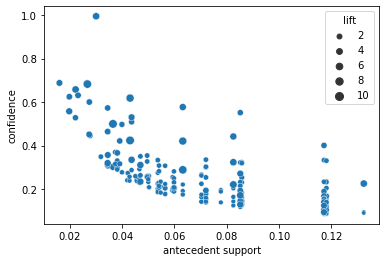

In [24]:
sns.scatterplot(x = "antecedent support", y = "confidence", size = "lift", data = rules)
plt.show()

In [25]:
# Filtering the list of results to reduce their number and keep only the most relevant results.
# Confidence indicates the probability that a customer will buy product Y (consequent) if he has bought product X (antecedent).
# The lift indicates whether the combination of products (antecedent -> consequent) can be due to chance.

In [26]:
filtered_rules = rules[(rules['antecedent support'] > 0.02) &
						(rules['confidence'] > 0.5) &
						(rules["lift"] > 5)]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(7194),(2181),0.030029,0.132377,0.029873,0.994810,7.514952,0.025898,167.161956
171,(7501),(7500),0.043589,0.085152,0.023119,0.530393,6.228805,0.019408,1.948116
183,(7815),(7814),0.043017,0.082502,0.026704,0.620773,7.524331,0.023155,2.419389
184,(7816),(7814),0.063175,0.082502,0.036471,0.577303,6.997431,0.031259,2.170579
187,(7815),(7816),0.043017,0.063175,0.026600,0.618357,9.787948,0.023883,2.454718
196,"(7500, 4124)",(7499),0.027431,0.117155,0.016469,0.600379,5.124652,0.013256,2.209204
207,"(7499, 7501)",(7500),0.022184,0.085152,0.014599,0.658080,7.728320,0.012710,2.675618
208,"(7500, 7501)",(7499),0.023119,0.117155,0.014599,0.631461,5.389958,0.011890,2.395524
219,"(7816, 7815)",(7814),0.026600,0.082502,0.018236,0.685547,8.309450,0.016041,2.917757
220,"(7814, 7815)",(7816),0.026704,0.063175,0.018236,0.682879,10.809262,0.016549,2.954159


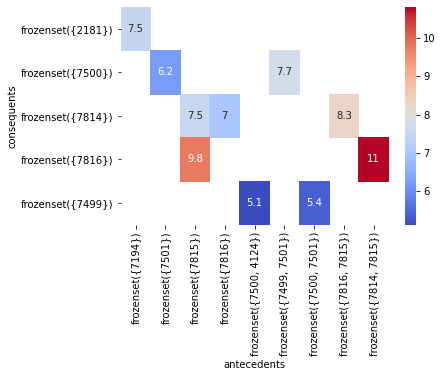

In [27]:
pivot = filtered_rules.pivot(index = "consequents", columns = "antecedents", values= "lift")

sns.heatmap(pivot, annot = True, cbar=True, cmap="coolwarm")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

> Based on this analysis, the most relevant associations are :
- products 7814, 7815 and 7816.
- Product 2181 (top 1) with product 7194.
- Products 4124 (top 2) and 7499 (top 3) with product 7500

In [28]:
# Search for products that should not be combined. 
# Zhang's metric : it measures both association and dissociation. It is bounded from below by -1 and bounded from above by 1. A value of 1 indicates perfect association. Negative 1 indicates perfect dissociation.

In [29]:
# Define an empty list for Zhang's metric
zhangs_metric = []

# Loop over lists in itemsets
for itemset in rules.iterrows():
    # Extract the antecedent and consequent columns
    l_a = list(itemset[1]['antecedents'])
    antecedent = basket_sets[l_a[0]]
    l_c = list(itemset[1]['consequents'])
    consequent = basket_sets[l_c[0]]
    # Complete Zhang's metric and append it to the list
    zhangs_metric.append(zhang(antecedent, consequent))

# Print results
rules['zhang'] = zhangs_metric
rules.sort_values(by="zhang", inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
21,(2181),(7499),0.132377,0.117155,0.011949,0.090267,0.770491,-0.003559,0.970444,-0.255577
20,(7499),(2181),0.117155,0.132377,0.011949,0.101996,0.770491,-0.003559,0.966167,-0.252282
17,(2181),(4124),0.132377,0.118090,0.012573,0.094976,0.804270,-0.003060,0.974461,-0.219051
16,(4124),(2181),0.118090,0.132377,0.012573,0.106467,0.804270,-0.003060,0.971003,-0.216270
72,(7816),(4124),0.063175,0.118090,0.012105,0.191612,1.622589,0.004645,1.090948,0.409576
...,...,...,...,...,...,...,...,...,...,...
187,(7815),(7816),0.043017,0.063175,0.026600,0.618357,9.787948,0.023883,2.454718,0.938192
182,(7814),(7815),0.082502,0.043017,0.026704,0.323678,7.524331,0.023155,1.414980,0.945068
218,"(7816, 7814)",(7815),0.036471,0.043017,0.018236,0.500000,11.623188,0.016667,1.913965,0.958380
186,(7816),(7815),0.063175,0.043017,0.026600,0.421053,9.787948,0.023883,1.652970,0.958380


In [30]:
dissociated = rules[rules["zhang"]<0]
dissociated

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
21,(2181),(7499),0.132377,0.117155,0.011949,0.090267,0.770491,-0.003559,0.970444,-0.255577
20,(7499),(2181),0.117155,0.132377,0.011949,0.101996,0.770491,-0.003559,0.966167,-0.252282
17,(2181),(4124),0.132377,0.118090,0.012573,0.094976,0.804270,-0.003060,0.974461,-0.219051
16,(4124),(2181),0.118090,0.132377,0.012573,0.106467,0.804270,-0.003060,0.971003,-0.216270


> This table shows which products should not be presented together:
- products 2181 and 4900 
- products 2181 and 4124